**Сегментация клиентов барбершопа Pablo's в Химках**


Задача: провести анализ клиентов и услуг, изучить отзывы и впечатление от заведения. Узнать причину оттока клиентов и дать рекомендации бизнесу

Цель: увеличение прибыли и борьба с оттоком клиентов

## Загрузка библиотек и датасетов

In [1]:
#загружаем библиотеки
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from itertools import combinations
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.metrics import silhouette_score
import sklearn
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
import plotly.graph_objs as go
from scipy import stats as st
import math as mth
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from sklearn.feature_selection import SelectFromModel
import numpy as np
import warnings
import re 
warnings.filterwarnings("ignore")
import imblearn


In [2]:
data = pd.read_excel('clients_advanced-2.xls')

In [3]:
rev = pd.read_excel('reviews.xls')

In [4]:
data.head()

,Клиент,Телефон,Email,"Выручка, ₽","% от общей выручки, ₽","Средний чек, ₽",Количество посещений,Дата,Сотрудник,Услуга/товар,"Стоимость, ₽","Скидка, %",Статус визита
0,Игорь,+7 977 504-63-14,NaN,62346.0,1.0,1484.43,42.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Игорь,+7 977 504-63-14,NaN,NaN,NaN,NaN,NaN,2022-11-01 10:00:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл
2,Игорь,+7 977 504-63-14,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:30:00,Максим (Soldado),Стрижка,1300.0,0.0,Клиент пришёл
3,Игорь,+7 977 504-63-14,NaN,NaN,NaN,NaN,NaN,2022-09-28 18:30:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл
4,Игорь,+7 977 504-63-14,NaN,NaN,NaN,NaN,NaN,2022-09-11 14:30:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл


In [5]:
rev.head()

,Имя,Телефон,Email,Дата,О сотруднике,Отзыв
0,Данила,+7 925 700-56-99,dmv_97@mail.ru,2022-11-16 17:37:53,Рахман (Capitan),NaN
1,Олег,+7 916 535-26-32,NaN,2022-11-16 16:40:57,Рахман (Capitan),Отличный мастер!
2,Юрий,+7 916 122-20-21,NaN,2022-11-15 21:07:27,Максим (Soldado),NaN
3,Евгений,+7 910 227-70-27,Production@amteng.ru,2022-11-12 19:17:10,Рахман (Capitan),Рахман как всегда на отлично! Спасибо!
4,Антон,+7 926 796-68-11,anton236@yandex.ru,2022-11-12 16:06:07,Максим (Soldado),Все супер!


## Предобработка данных

### Обзор данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Клиент                 5542 non-null   object 
 1   Телефон                5542 non-null   object 
 2   Email                  257 non-null    object 
 3   Выручка, ₽             1294 non-null   float64
 4   % от общей выручки, ₽  1294 non-null   float64
 5   Средний чек, ₽         1294 non-null   float64
 6   Количество посещений   1294 non-null   float64
 7   Дата                   4249 non-null   object 
 8   Сотрудник              4249 non-null   object 
 9   Услуга/товар           4218 non-null   object 
 10  Стоимость, ₽           4249 non-null   float64
 11  Скидка, %              4249 non-null   float64
 12  Статус визита          4028 non-null   object 
dtypes: float64(6), object(7)
memory usage: 563.1+ KB


In [7]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Имя           93 non-null     object
 1   Телефон       93 non-null     object
 2   Email         41 non-null     object
 3   Дата          93 non-null     object
 4   О сотруднике  93 non-null     object
 5   Отзыв         60 non-null     object
dtypes: object(6)
memory usage: 4.5+ KB


В нашем распоряжении два файла

`data` - общие сведения о клиентах и посещениях. Нужно поменять все типы данных, заполнить пропуски и проверить полные дубликаты

`rev` - список отзывов. которые оставляли клиенты. Тоже нужно поменять типы данных и заполнить пропуски

In [8]:
data.describe()

,"Выручка, ₽","% от общей выручки, ₽","Средний чек, ₽",Количество посещений,"Стоимость, ₽","Скидка, %"
count,1294.000000,1294.000000,1294.000000,1294.000000,4249.000000,4249.000000
mean,4558.088099,0.063369,1479.854583,2.932767,1317.532361,3.900993
std,6461.212676,0.116483,574.943367,3.921025,499.206657,14.330466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.000000,0.000000,1200.000000,1.000000,1100.000000,0.000000
50%,2080.000000,0.000000,1300.000000,1.000000,1250.000000,0.000000
75%,4797.500000,0.100000,1676.652500,3.000000,1600.000000,0.000000
max,62346.000000,1.000000,8963.000000,42.000000,2950.000000,100.000000


- У нас 1294 уникальных клиента. 
- Средняя цена визита 1479р.
- Среднее количество визитов 2,9
- Средняя скидка 3,9%
- Средний % от общего оборота 0,06
- Максимальная выручка 62.346р.
- Максимальное количество визитов  42

### Названия колонок

In [9]:
#переименовываем столбцы
data.columns = ['client', 'phone', 'email', 'cost', 'perc_cost', 'mean_visits', 'visits', 'date', 'employee', 'order', 'price', 'sale', 'status_visits']
rev.columns = ['client', 'phone', 'email', 'date', 'employee', 'review']

In [10]:
data.head(2)

,client,phone,email,cost,perc_cost,mean_visits,visits,date,employee,order,price,sale,status_visits
0,Игорь,+7 977 504-63-14,NaN,62346.0,1.0,1484.43,42.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Игорь,+7 977 504-63-14,NaN,NaN,NaN,NaN,NaN,2022-11-01 10:00:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл


In [11]:
rev.head(2)

,client,phone,email,date,employee,review
0,Данила,+7 925 700-56-99,dmv_97@mail.ru,2022-11-16 17:37:53,Рахман (Capitan),NaN
1,Олег,+7 916 535-26-32,NaN,2022-11-16 16:40:57,Рахман (Capitan),Отличный мастер!


### Пропущенные значения

In [12]:
data.isna().sum()

client              1
phone               1
email            5286
cost             4249
perc_cost        4249
mean_visits      4249
visits           4249
date             1294
employee         1294
order            1325
price            1294
sale             1294
status_visits    1515
dtype: int64

In [13]:
rev.isna().sum()

client       0
phone        0
email       52
date         0
employee     0
review      33
dtype: int64

Есть пропуски, заменим на "-", а в столбце `status_visits` на "итог" - сроки в которых отсутствует эта строка, относится к каждому клиенту с общей информацией по визитам, тратам и тд. янужно будет для фильтрации

In [14]:
data['status_visits'] = data['status_visits'].fillna('итог') 
data['email'] = data['email'].fillna('-')

In [15]:
data.head()

,client,phone,email,cost,perc_cost,mean_visits,visits,date,employee,order,price,sale,status_visits
0,Игорь,+7 977 504-63-14,-,62346.0,1.0,1484.43,42.0,NaN,NaN,NaN,NaN,NaN,итог
1,Игорь,+7 977 504-63-14,-,NaN,NaN,NaN,NaN,2022-11-01 10:00:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл
2,Игорь,+7 977 504-63-14,-,NaN,NaN,NaN,NaN,2022-10-19 18:30:00,Максим (Soldado),Стрижка,1300.0,0.0,Клиент пришёл
3,Игорь,+7 977 504-63-14,-,NaN,NaN,NaN,NaN,2022-09-28 18:30:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл
4,Игорь,+7 977 504-63-14,-,NaN,NaN,NaN,NaN,2022-09-11 14:30:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл


In [16]:
rev['review'] = rev['review'].fillna('только оценка') 
rev = rev.fillna('-')
rev.head()

,client,phone,email,date,employee,review
0,Данила,+7 925 700-56-99,dmv_97@mail.ru,2022-11-16 17:37:53,Рахман (Capitan),только оценка
1,Олег,+7 916 535-26-32,-,2022-11-16 16:40:57,Рахман (Capitan),Отличный мастер!
2,Юрий,+7 916 122-20-21,-,2022-11-15 21:07:27,Максим (Soldado),только оценка
3,Евгений,+7 910 227-70-27,Production@amteng.ru,2022-11-12 19:17:10,Рахман (Capitan),Рахман как всегда на отлично! Спасибо!
4,Антон,+7 926 796-68-11,anton236@yandex.ru,2022-11-12 16:06:07,Максим (Soldado),Все супер!


### Создание новых датасетов

In [17]:
users = data[['client', 'phone', 'cost', 'perc_cost', 'mean_visits', 'visits']]
users = users.fillna(-11)
users['cost'] = users['cost'].astype(int)
users = users.query('cost != -11').reset_index(drop=True)
users.head()

,client,phone,cost,perc_cost,mean_visits,visits
0,Игорь,+7 977 504-63-14,62346,1.0,1484.43,42.0
1,Сергей Александрович,+7 985 994-22-27,53940,0.9,3371.25,16.0
2,Сергей,+7 925 492-82-47,53450,0.9,1619.70,33.0
3,Николай,+7 925 443-97-65,44689,0.7,1718.81,26.0
4,Армен,+7 930 333-30-00,44450,0.7,1778.00,25.0


В таблице `users` - собраны данные о клиентах, сумме визитов, количестве визитов.

In [18]:
visits = data.query('status_visits != "итог"')
visits = visits[['client', 'phone', 'email', 'date', 'employee', 'order', 'price', 'sale', 'status_visits']]
visits.head()

,client,phone,email,date,employee,order,price,sale,status_visits
1,Игорь,+7 977 504-63-14,-,2022-11-01 10:00:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл
2,Игорь,+7 977 504-63-14,-,2022-10-19 18:30:00,Максим (Soldado),Стрижка,1300.0,0.0,Клиент пришёл
3,Игорь,+7 977 504-63-14,-,2022-09-28 18:30:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл
4,Игорь,+7 977 504-63-14,-,2022-09-11 14:30:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл
5,Игорь,+7 977 504-63-14,-,2022-09-11 14:30:00,Максим (Soldado),Стрижка,1300.0,0.0,Клиент пришёл


Таблица `visits` - все данные о визитах клиентов, потраченной стоимости и купленных товаров

### Типы данных

In [19]:
#меняем типы данных
users['perc_cost'] = users['perc_cost'].astype(int)
users['mean_visits'] = users['mean_visits'].astype(int)
users['visits'] = users['visits'].astype(int)

In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   client       1294 non-null   object
 1   phone        1294 non-null   object
 2   cost         1294 non-null   int32 
 3   perc_cost    1294 non-null   int32 
 4   mean_visits  1294 non-null   int32 
 5   visits       1294 non-null   int32 
dtypes: int32(4), object(2)
memory usage: 40.6+ KB


In [21]:
visits['date'] = visits['date'].astype('datetime64[ns]')
visits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4028 entries, 1 to 5542
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   client         4027 non-null   object        
 1   phone          4027 non-null   object        
 2   email          4028 non-null   object        
 3   date           4028 non-null   datetime64[ns]
 4   employee       4028 non-null   object        
 5   order          3998 non-null   object        
 6   price          4028 non-null   float64       
 7   sale           4028 non-null   float64       
 8   status_visits  4028 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 314.7+ KB


### Новые колонки

In [22]:
#добавим несколько новых колонок
visits['data_visit'] = visits['date'].dt.date
visits['time_visit'] = visits['date'].dt.time
visits['month_visit'] = visits['date'].dt.month
visits.head(1)

,client,phone,email,date,employee,order,price,sale,status_visits,data_visit,time_visit,month_visit
1,Игорь,+7 977 504-63-14,-,2022-11-01 10:00:00,Рахман (Capitan),Стрижка,1600.0,0.0,Клиент пришёл,2022-11-01,10:00:00,11


In [23]:
users.shape

(1294, 6)

In [24]:
x = visits.groupby('phone')['data_visit'].min().reset_index()
x
users = users.merge(x, on='phone', how='left')
users.columns = ['client', 'phone', 'cost', 'perc_cost', 'mean_visits', 'visits', 'first_visits']
users.head()

,client,phone,cost,perc_cost,mean_visits,visits,first_visits
0,Игорь,+7 977 504-63-14,62346,1,1484,42,2021-03-01
1,Сергей Александрович,+7 985 994-22-27,53940,0,3371,16,2021-04-01
2,Сергей,+7 925 492-82-47,53450,0,1619,33,2021-03-04
3,Николай,+7 925 443-97-65,44689,0,1718,26,2021-03-13
4,Армен,+7 930 333-30-00,44450,0,1778,25,2021-09-29


In [25]:
y = visits.groupby('phone')['data_visit'].max().reset_index()

users = users.merge(y, on='phone', how='left')
users.columns = ['client', 'phone', 'cost', 'perc_cost', 'mean_visits', 'visits', 'first_visit', 'last_visit']
users.head()

,client,phone,cost,perc_cost,mean_visits,visits,first_visit,last_visit
0,Игорь,+7 977 504-63-14,62346,1,1484,42,2021-03-01,2022-11-01
1,Сергей Александрович,+7 985 994-22-27,53940,0,3371,16,2021-04-01,2022-09-15
2,Сергей,+7 925 492-82-47,53450,0,1619,33,2021-03-04,2022-09-12
3,Николай,+7 925 443-97-65,44689,0,1718,26,2021-03-13,2022-11-05
4,Армен,+7 930 333-30-00,44450,0,1778,25,2021-09-29,2022-11-09


In [26]:
users['last_visit'] = users['last_visit'].astype('datetime64[ns]')
users['first_visit'] = users['first_visit'].astype('datetime64[ns]')
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1294 entries, 0 to 1293
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   client       1294 non-null   object        
 1   phone        1294 non-null   object        
 2   cost         1294 non-null   int32         
 3   perc_cost    1294 non-null   int32         
 4   mean_visits  1294 non-null   int32         
 5   visits       1294 non-null   int32         
 6   first_visit  1230 non-null   datetime64[ns]
 7   last_visit   1230 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(4), object(2)
memory usage: 70.8+ KB


In [27]:
#добавляем столбец delta - количество дней с последнего визита и столбец последнего визита
users['delta'] = dt.datetime.now() - users['last_visit']
users['delta'] = users['delta'].dt.days
users['delta'] = users['delta'].fillna(-10)
users['delta'] = users['delta'].astype(int)
users.head()

,client,phone,cost,perc_cost,mean_visits,visits,first_visit,last_visit,delta
0,Игорь,+7 977 504-63-14,62346,1,1484,42,2021-03-01,2022-11-01,20
1,Сергей Александрович,+7 985 994-22-27,53940,0,3371,16,2021-04-01,2022-09-15,67
2,Сергей,+7 925 492-82-47,53450,0,1619,33,2021-03-04,2022-09-12,70
3,Николай,+7 925 443-97-65,44689,0,1718,26,2021-03-13,2022-11-05,16
4,Армен,+7 930 333-30-00,44450,0,1778,25,2021-09-29,2022-11-09,12


In [28]:
#добавляем столбец оттока. Если клиент не был более 3 месяцев, то он попадает в отток
def churn(delta):
    if delta > 90:
        return 1
    elif delta == -10:
        return 1
    else:
        return 0
        
users['churn'] = users['delta'].apply(churn)
users

,client,phone,cost,perc_cost,mean_visits,visits,first_visit,last_visit,delta,churn
0,Игорь,+7 977 504-63-14,62346,1,1484,42,2021-03-01,2022-11-01,20,0
1,Сергей Александрович,+7 985 994-22-27,53940,0,3371,16,2021-04-01,2022-09-15,67,0
2,Сергей,+7 925 492-82-47,53450,0,1619,33,2021-03-04,2022-09-12,70,0
3,Николай,+7 925 443-97-65,44689,0,1718,26,2021-03-13,2022-11-05,16,0
4,Армен,+7 930 333-30-00,44450,0,1778,25,2021-09-29,2022-11-09,12,0
...,...,...,...,...,...,...,...,...,...,...
1289,Артем,+7 929 959-93-57,400,0,400,1,2021-05-31,2021-05-31,539,1
1290,Юрген,+7 977 394-02-41,300,0,300,1,2022-03-04,2022-03-04,262,1
1291,Настя,+7 977 444-96-67,0,0,0,2,2021-11-20,2022-06-08,166,1
1292,Юрий,+7 916 102-60-43,0,0,0,5,NaT,NaT,-10,1


## EDA - исследовательский анализ данных

### Визиты и дни с последнего визита

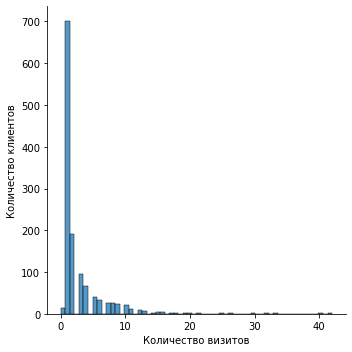

In [29]:
#создадим диаграмму рассеивания

sns.displot(users, x='visits', palette="tab10", kind='hist', bins = 60)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество визитов')
plt.show()

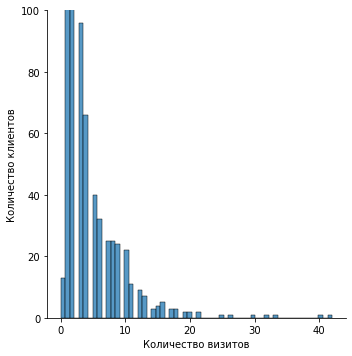

In [30]:
#посмотрим ближе
sns.displot(users, x='visits', palette="tab10", kind='hist', bins = 60)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество визитов')
plt.ylim(0, 100)
plt.show()

Большинство клиентов ходят 1-2 раза (до 5). Встречаются клиенты, которые ходят от 20 до 40 раз, но таких очень мало

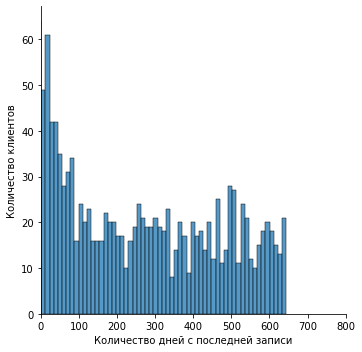

In [31]:
sns.displot(users, x='delta', palette="tab10", kind='hist', bins = 60)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество дней с последней записи')
plt.xlim(0, 800)
plt.show()

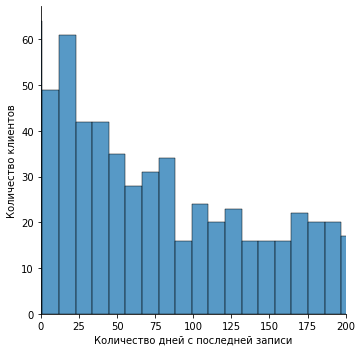

In [32]:
sns.displot(users, x='delta', palette="tab10", kind='hist', bins = 60)
plt.ylabel('Количество клиентов')
plt.xlabel('Количество дней с последней записи')
plt.xlim(0, 200)
plt.show()

Есть клиенты, которые не ходят уже более 200 дней, встречаются даже более 600. Но в основном до месяца.

Предлагаю разделить клиентов на группы и посмотреть сколько дней большинство уже не ходит

In [33]:
test = users[['phone', 'delta']]

def group(delta):
    if 0 < delta < 30:
        return '1 месяц'
    elif 31 < delta < 60:
        return '2 месяца'
    elif 61 < delta < 90:
        return '3 месяца'
    elif 91 < delta < 120:
        return '4 месяца'
    elif 121 < delta < 150:
        return '5 месяцев'
    else:
        return 'более 6 месяцев'
    
test['group'] = test['delta'].apply(group)
test

,phone,delta,group
0,+7 977 504-63-14,20,1 месяц
1,+7 985 994-22-27,67,3 месяца
2,+7 925 492-82-47,70,3 месяца
3,+7 925 443-97-65,16,1 месяц
4,+7 930 333-30-00,12,1 месяц
...,...,...,...
1289,+7 929 959-93-57,539,более 6 месяцев
1290,+7 977 394-02-41,262,более 6 месяцев
1291,+7 977 444-96-67,166,более 6 месяцев
1292,+7 916 102-60-43,-10,более 6 месяцев


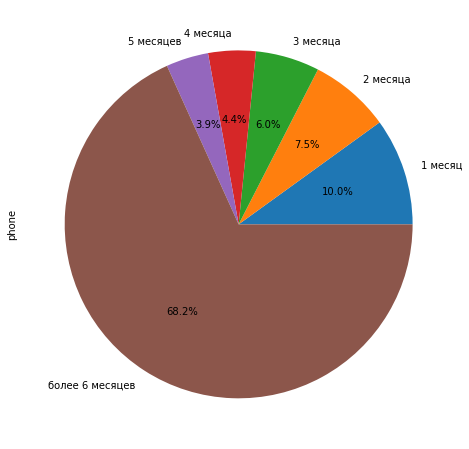

In [34]:
plt.rcParams['figure.figsize'] = [8, 8]
test.groupby('group')['phone'].count().plot(y='phone', kind='pie', autopct='%1.1f%%')
plt.show()

- Почти 70% клиентов не ходят уже более 6 месяцев. 
- Те, кто не посещал месяц или был в этом месяце (то есть активные клиенты), составляют всего 11,4%. Это очень мало от всей базы. 
- 2-3 месяца не посещали - 7% и 5,8%. 
- Если клиент не был более 1,5-2 месяцев, то его можно считать потеряным, именно так мы определили группу оттока. 
- Если клиент не был более 3х месяцев он точно сходил в другое место.
- Нужно выяснить причину такого дикого оттока.

### Время посещения

In [35]:
#самое популярное время
visits['time_visit'].value_counts().head(10)

12:00:00    210
20:00:00    182
19:00:00    180
13:00:00    175
18:00:00    167
14:00:00    164
10:00:00    164
17:00:00    163
15:00:00    158
16:00:00    155
Name: time_visit, dtype: int64

In [36]:
time = visits[['phone', 'time_visit', 'date']]
time.head()

,phone,time_visit,date
1,+7 977 504-63-14,10:00:00,2022-11-01 10:00:00
2,+7 977 504-63-14,18:30:00,2022-10-19 18:30:00
3,+7 977 504-63-14,18:30:00,2022-09-28 18:30:00
4,+7 977 504-63-14,14:30:00,2022-09-11 14:30:00
5,+7 977 504-63-14,14:30:00,2022-09-11 14:30:00


In [37]:
time['hour_visit'] = visits['date'].dt.hour
time.head()

,phone,time_visit,date,hour_visit
1,+7 977 504-63-14,10:00:00,2022-11-01 10:00:00,10
2,+7 977 504-63-14,18:30:00,2022-10-19 18:30:00,18
3,+7 977 504-63-14,18:30:00,2022-09-28 18:30:00,18
4,+7 977 504-63-14,14:30:00,2022-09-11 14:30:00,14
5,+7 977 504-63-14,14:30:00,2022-09-11 14:30:00,14


In [38]:
time['hour_visit'] = time['hour_visit'].astype(int)

In [39]:
#посмотрим в какой час ходят больше всего, чтобы выяснить провальное время

def group_time(time):
    if 8 <= time < 10:
        return 'С 8:00 до 10:00'
    elif 10 <= time < 12:
        return 'С 10:00 до 12:00'
    elif 12 <= time < 14:
        return 'С 12:00 до 14:00'
    elif 14 <= time < 16:
        return 'С 14:00 до 16:00'
    elif 16 <= time < 18:
        return 'С 16:00 до 18:00'
    elif 18 <= time < 20:
        return 'С 18:00 до 20:00'
    elif 20 <= time <= 23:
        return 'С 20:00 до 23:00'
    else:
        return 'другое'
    
time['group_time'] = time['hour_visit'].apply(group_time)
time.head()

,phone,time_visit,date,hour_visit,group_time
1,+7 977 504-63-14,10:00:00,2022-11-01 10:00:00,10,С 10:00 до 12:00
2,+7 977 504-63-14,18:30:00,2022-10-19 18:30:00,18,С 18:00 до 20:00
3,+7 977 504-63-14,18:30:00,2022-09-28 18:30:00,18,С 18:00 до 20:00
4,+7 977 504-63-14,14:30:00,2022-09-11 14:30:00,14,С 14:00 до 16:00
5,+7 977 504-63-14,14:30:00,2022-09-11 14:30:00,14,С 14:00 до 16:00


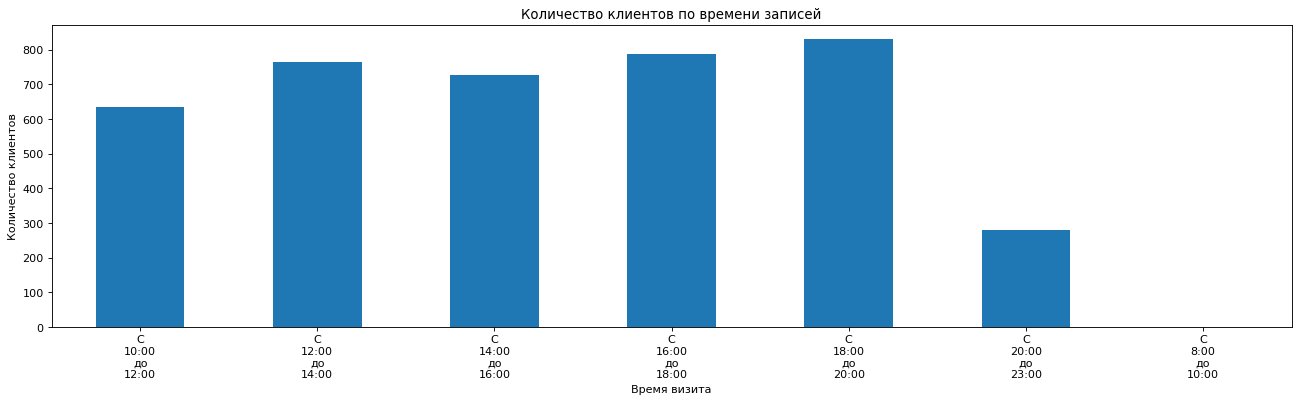

In [40]:
plt.figure(figsize=(20,5))
time.groupby('group_time')['phone'].count().plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.xlabel('Время визита')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов по времени записей')
plt.show()

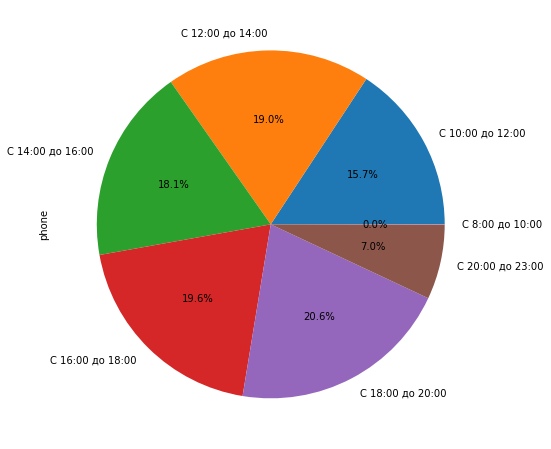

In [41]:
plt.rcParams['figure.figsize'] = [8, 8]
time.groupby('group_time')['phone'].count().plot(y='phone', kind='pie', autopct='%1.1f%%')
plt.show()

In [42]:
time.groupby('group_time')['phone'].count().sort_values(ascending = False)

group_time
С 18:00 до 20:00    830
С 16:00 до 18:00    789
С 12:00 до 14:00    765
С 14:00 до 16:00    728
С 10:00 до 12:00    634
С 20:00 до 23:00    280
С 8:00 до 10:00       1
Name: phone, dtype: int64

- Самый пик популярности у записей с 18 до 20 - 20,5%, это логично, клиенты чаще приходят после работы. 
- На втором месте время с 16 до 18 - 19,5% - либо те, кто раньше заканчивает, либо те, кто является студентами
- Меньше всего записей с 20 до 23 - всего 7%. 

### Дни недели

In [43]:
time['date'] = time['date'].astype('datetime64[ns]')
time['day'] = time['date'].dt.weekday
time

,phone,time_visit,date,hour_visit,group_time,day
1,+7 977 504-63-14,10:00:00,2022-11-01 10:00:00,10,С 10:00 до 12:00,1
2,+7 977 504-63-14,18:30:00,2022-10-19 18:30:00,18,С 18:00 до 20:00,2
3,+7 977 504-63-14,18:30:00,2022-09-28 18:30:00,18,С 18:00 до 20:00,2
4,+7 977 504-63-14,14:30:00,2022-09-11 14:30:00,14,С 14:00 до 16:00,6
5,+7 977 504-63-14,14:30:00,2022-09-11 14:30:00,14,С 14:00 до 16:00,6
...,...,...,...,...,...,...
5537,+7 916 102-60-45,13:45:00,2022-08-11 13:45:00,13,С 12:00 до 14:00,3
5538,+7 916 102-60-46,11:30:00,2022-06-10 11:30:00,11,С 10:00 до 12:00,4
5539,+7 916 102-60-47,16:30:00,2022-04-17 16:30:00,16,С 16:00 до 18:00,6
5540,+7 916 102-60-48,12:00:00,2022-01-29 12:00:00,12,С 12:00 до 14:00,5


- 0 это понедельник, 6 - это воскресенье

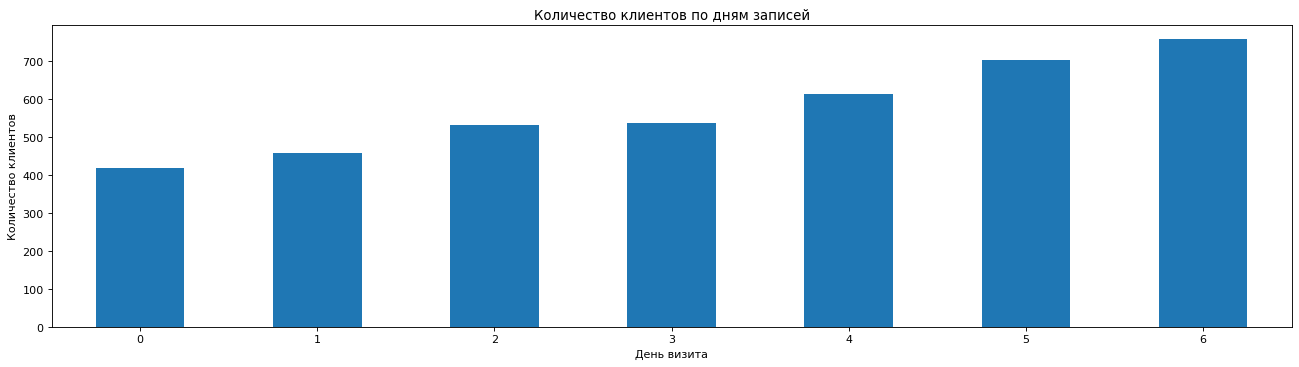

In [44]:
plt.figure(figsize=(20,5))
time.groupby('day')['phone'].count().plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.xlabel('День визита')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов по дням записей')
plt.show()

- Логично, что по выходным клиентов больше, чем в будни.
- Самый проавльный день это понедельник

### Количество визитов

In [45]:
users.groupby('visits')['phone'].count().sort_values(ascending = False)

visits
1     701
2     192
3      96
4      66
5      40
6      32
8      25
7      25
9      24
10     22
0      13
11     11
12      9
13      7
16      5
15      4
18      3
14      3
17      3
19      2
20      2
21      2
25      1
26      1
30      1
32      1
33      1
40      1
42      1
Name: phone, dtype: int64

In [46]:
users['visits'].mean()

2.9327666151468317

- Больше всего клиентов, кто был 1 раз. Нужно более подробно расмотреть таких клиентов.
- В среднем клиенты ходят 3 раза
- Встречаются клиенты, у которых более 20 визитов

### E-mail

In [47]:
print('Всего оставили эл.почту:', (data.query('email != "-"')['email'].count()))

Всего оставили эл.почту: 257


- Не так много клиентов оставляют свою почту, поэтоу лучше использовать мобильный телефон для массовых рассылок акций и спецпредложений

### Стоимость визитов

In [48]:
users['mean_visits'].describe()

count    1294.000000
mean     1479.778980
std       574.932135
min         0.000000
25%      1200.000000
50%      1300.000000
75%      1676.500000
max      8963.000000
Name: mean_visits, dtype: float64

- В среднем каждый клиент оставляет 1480р, а самый большой чек - почти 9тыс.р

### Прайс и услуги

In [49]:
#многие услуги записаны по разному, поэтому приведем все буквы к нижнему регистру
visits['order'] = visits['order'].str.lower()

In [50]:
#поменяем названия услуг, чтобы избавиться от задвоения
def ord (order):
    if order == 'стрижка головы машинкой (2 насадки)':
        return 'стрижка головы машинкой 2 насадки'
    elif order == 'стрижка головы + моделирование бороды':
        return 'стрижка + моделирование бороды'
    elif order == 'мытье головы+ окантовка + укладка':
        return 'мытье головы + окантовка + укладка'
    elif order == 'отец+ сын':
        return 'отец + сын'
    else:
        return order
visits['order'] = visits['order'].apply(ord)

In [51]:
visits['order'].value_counts().sort_values(ascending = False)

стрижка                               2477
стрижка + моделирование бороды         505
детская стрижка (с 5 до 12 лет)        252
стрижка головы машинкой 2 насадки      218
моделирование бороды                   128
стрижка бороды (машинкой)               91
стрижка головы (машинкой)               74
воск                                    71
традиционное бритье                     37
отец + сын                              32
тонировка бороды                        23
камуфляж седины                         17
премиум стрижка                         17
мытье головы + окантовка + укладка      14
воск (все зоны)                         14
черная маска                             9
премиум мытье головы                     7
мытье головы + укладка                   7
премиум моделирование                    4
премиальный уход за лицом                1
Name: order, dtype: int64

In [52]:
visits.groupby('order')['price'].median().sort_values()

order
воск (все зоны)                        300.0
премиум мытье головы                   350.0
воск                                   400.0
мытье головы + окантовка + укладка     500.0
мытье головы + укладка                 500.0
стрижка головы (машинкой)              650.0
стрижка бороды (машинкой)              700.0
тонировка бороды                       800.0
черная маска                           800.0
камуфляж седины                        850.0
стрижка головы машинкой 2 насадки      900.0
традиционное бритье                   1000.0
детская стрижка (с 5 до 12 лет)       1000.0
моделирование бороды                  1050.0
стрижка                               1300.0
премиальный уход за лицом             1500.0
премиум моделирование                 1700.0
отец + сын                            2000.0
стрижка + моделирование бороды        2100.0
премиум стрижка                       2200.0
Name: price, dtype: float64

- Чаще всего приходят на `стрижку`
- на втором месте : `Стрижка + моделирование бороды`
- Не много посещений на услугу `отец + сын`
- Редко делают `Премиум моделирование` , `премиальный уход за лицом`

### Количество записей по месяцам

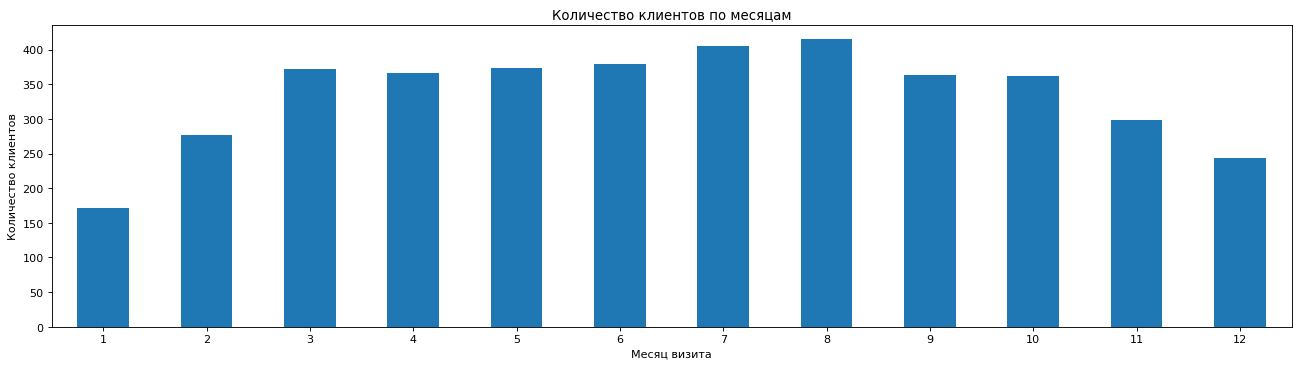

In [53]:
plt.figure(figsize=(20,5))
visits.groupby('month_visit')['phone'].count().plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.xlabel('Месяц визита')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов по месяцам')
plt.show()

 - Как и в любом бизнесе самый провал в январе и начале февраля. Очень странно, что в декабре тоже упадок

In [54]:
visits['year'] = visits['date'].dt.year

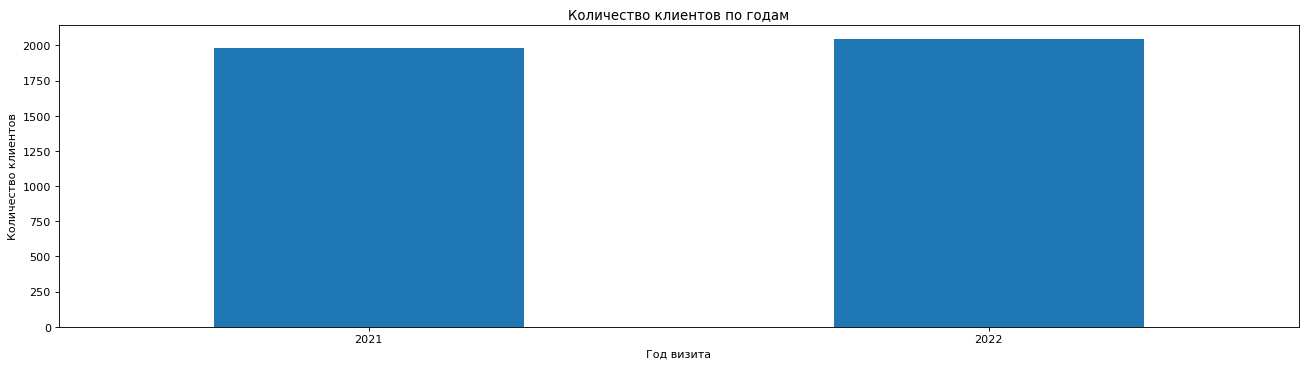

In [55]:
plt.figure(figsize=(20,5))
visits.groupby('year')['phone'].count().plot(kind='bar')
plt.gcf().set_dpi(80)

old_ticks, old_labels = plt.xticks()
plt.xticks(old_ticks, ['\n'.join(label.get_text().split()) for label in old_labels], rotation=0)

plt.xlabel('Год визита')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов по годам')
plt.show()

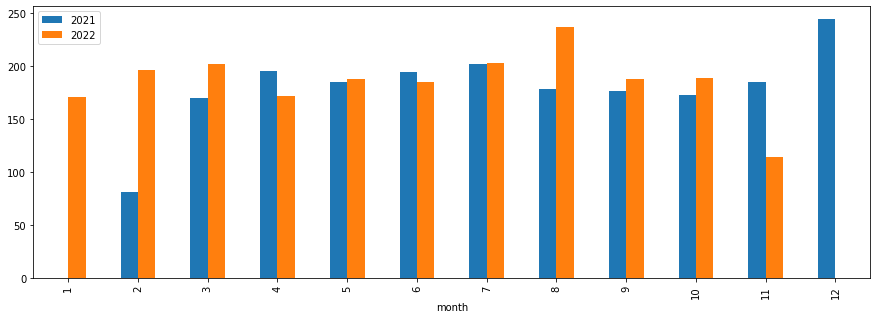

In [56]:
data_test = visits[['year', 'month_visit', 'phone']]
x = data_test.query('year == 2021')
y = data_test.query('year == 2022')

xy = pd.DataFrame({'2021' : x['month_visit'],
                   '2022' : y['month_visit'],
                   'month' : data_test['month_visit']})
xy = xy.groupby('month').count()
xy.plot(kind='bar', figsize=(15,5))
plt.show()

- В сравнение двух годов, ситуация следущая: провал в январе и декабре, объясняется тем, что в 2021 не было работы в январе, а в 2022 декабрь еще не наступил. 
- Февраль в 2022 неплох. Провал есть в апреле. 
- За ноябрь данные еще не полные, но нужно перегнать прошлый год
- Август самый рекордный в 2022 году

### Новые клиенты

In [57]:
new_client = users[['phone', 'first_visit']]
new_client['month'] = new_client['first_visit'].dt.month
new_client['year'] = new_client['first_visit'].dt.year
new_client = new_client.dropna(subset=['month'])
new_client['month'] = new_client['month'].astype(int)
new_client['year'] = new_client['year'].astype(int)
new_client

,phone,first_visit,month,year
0,+7 977 504-63-14,2021-03-01,3,2021
1,+7 985 994-22-27,2021-04-01,4,2021
2,+7 925 492-82-47,2021-03-04,3,2021
3,+7 925 443-97-65,2021-03-13,3,2021
4,+7 930 333-30-00,2021-09-29,9,2021
...,...,...,...,...
1287,+7 916 436-61-71,2021-03-21,3,2021
1288,+7 910 699-31-25,2021-04-15,4,2021
1289,+7 929 959-93-57,2021-05-31,5,2021
1290,+7 977 394-02-41,2022-03-04,3,2022


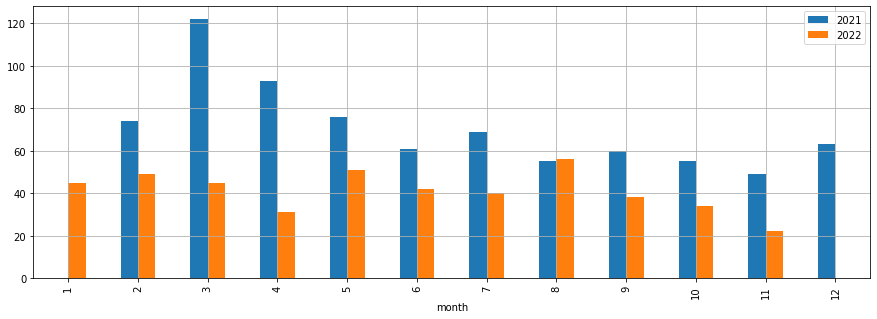

In [58]:
data_test_1 = new_client[['year', 'month', 'phone']]
x1 = data_test_1.query('year == 2021')
y1 = data_test_1.query('year == 2022')

xy1 = pd.DataFrame({'2021' : x1['month'],
                   '2022' : y1['month'],
                   'month' : data_test_1['month']})
xy1 = xy1.groupby('month').count()
xy1.plot(kind='bar', figsize=(15,5), grid=True)
plt.show()

In [59]:
print('Новые клиенты в 2021 году:', x1['phone'].count(), 'или', (x1['phone'].count() * 100 / data_test_1['phone'].count()).round(2) , '% от общего числа')
print('Новые клиенты в 2022 году:', y1['phone'].count(), 'или', (y1['phone'].count() * 100 / data_test_1['phone'].count()).round(2) , '% от общего числа')

Новые клиенты в 2021 году: 777 или 63.17 % от общего числа
Новые клиенты в 2022 году: 453 или 36.83 % от общего числа


- В 2022 году заметно снизилось прибавление новых клиентов
- Самый пик в 2021 году - март и апрель
- Самый пик в 2022 году - август и май
- Необходимо добится стабильности в привлечении клиентов, искать новые каналы и способы рекламы
- В 2022 году было привлечено только 37% новых клиентов от общего числа новичков. Показатели не должны падать

### Скидки

Пока не очень понятно за что дают скидки, или первый визит, или исправление косяков, или что-то другое

In [60]:
visits['sale'].value_counts()

0.00      3541
20.00      374
10.00       63
100.00      15
50.00       11
23.08        8
23.53        3
15.00        3
12.00        3
40.00        1
5.00         1
25.00        1
59.38        1
18.75        1
14.29        1
16.67        1
Name: sale, dtype: int64

- 20% - это скорее всего скидка новым клиентам, надо посмотреть действует ли она до сих пор, потому что 374 человека это явно не все новенькие клиенты
- 100% - отличная скидка)) за что же повезло 15 клиентам, возможно это были подарки или коррекции стрижек

In [61]:
sale = visits[['phone', 'sale', 'data_visit', 'month_visit', 'year']]
print(sale.query('sale == 20.00 and year == 2021').groupby('month_visit')['sale'].value_counts())
print(sale.query('sale == 20.00 and year == 2022').groupby('month_visit')['sale'].value_counts())

month_visit  sale
3            20.0     9
4            20.0     8
5            20.0    21
6            20.0    30
9            20.0     7
12           20.0     2
Name: sale, dtype: int64
month_visit  sale
2            20.0     2
5            20.0    44
6            20.0    38
7            20.0    47
8            20.0    62
9            20.0    41
10           20.0    40
11           20.0    23
Name: sale, dtype: int64


- Согласно одному отзыву, клиенту дали скидку 20% как новому клиенту при первом визите. Удивительно, что такая скидка дается не каждому.

### Статус визита

In [62]:
visits['status_visits'].value_counts()

Клиент пришёл        3863
Клиент не пришёл      162
Ожидание клиента        2
Клиент подтвердил       1
Name: status_visits, dtype: int64

- Если клиент не пришел, стоит ему предложить перезаписаться

### Отток

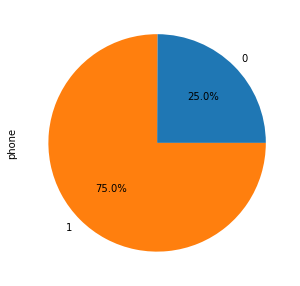

In [63]:
plt.rcParams['figure.figsize'] = [5, 5]
users.groupby('churn')['phone'].count().plot(y='phone', kind='pie', autopct='%1.1f%%')
plt.show()

- 75% клиентов находятся в оттоке. Их срочно нужно оттуда доставать

### Мастера

In [64]:
visits.query('year == 2022').groupby('employee')['phone'].count().sort_values(ascending=False)

employee
Рахман (Capitan)     1175
Максим (Soldado)      339
Макс (Capitan)        271
Павел (Capitan)        63
Давид  (Soldado)       56
Валерия                47
Татьяна (Soldado)      22
Хамза (Soldado)        21
Елена (Capitan)        10
Ирина                  10
Иван(Soldado)           6
Алена                   5
Кроки(Soldato)          5
Мария                   5
Шах (Soldado)           4
Макс                    3
Аннет (Стажер)          1
Евгения                 1
Name: phone, dtype: int64

In [65]:
visits.query('year == 2022').groupby('employee')['data_visit'].max().sort_values(ascending=False)

employee
Шах (Soldado)        2022-11-16
Рахман (Capitan)     2022-11-16
Максим (Soldado)     2022-11-15
Макс                 2022-11-14
Аннет (Стажер)       2022-11-09
Валерия              2022-11-07
Мария                2022-10-29
Павел (Capitan)      2022-09-23
Алена                2022-09-11
Елена (Capitan)      2022-09-03
Макс (Capitan)       2022-06-12
Евгения              2022-04-23
Хамза (Soldado)      2022-04-19
Давид  (Soldado)     2022-03-06
Ирина                2022-03-02
Иван(Soldado)        2022-02-02
Кроки(Soldato)       2022-01-20
Татьяна (Soldado)    2022-01-19
Name: data_visit, dtype: object

- Рахман видимо самый старый мастер в барбершопе
- Судя по датам последних записей, работают сейчас: Шах (Soldado), Рахман (Capitan), Максим (Soldado), Макс, Аннет (Стажер) и Валерия

## Единоразовые клиенты

### Клиенты, посетившие один раз

Так как в базе очень много клиентов, посетившие заведение единожды, рассмотрим их подробнее

In [66]:
one = users.query('visits == 1')
one.head()

,client,phone,cost,perc_cost,mean_visits,visits,first_visit,last_visit,delta,churn
310,Юрий,+7 963 081-22-85,4960,0,4960,1,2022-06-06,2022-06-06,168,1
332,Роман,+7 915 457-81-19,4600,0,4600,1,2022-03-02,2022-03-02,264,1
347,Андрей,+7 999 982-61-87,4400,0,4400,1,2021-02-18,2021-02-18,641,1
350,Павел,+7 985 612-46-75,4320,0,4320,1,2022-07-01,2022-07-01,143,1
351,Дмитрий,+7 925 873-40-02,4250,0,4250,1,2022-03-07,2022-03-07,259,1


In [67]:
print('Всего клиентов:', users['phone'].count())
print('Всего единоразовых клиентов:', one['phone'].count(), 'или', (one['phone'].count() * 100 / users['phone'].count()).round(2), '%')

Всего клиентов: 1294
Всего единоразовых клиентов: 701 или 54.17 %


- Половина клиентов пришли только один раз

In [68]:
one['first_month'] = one['first_visit'].dt.month
one = one.dropna(subset=['first_month'])
one['first_year'] = one['first_visit'].dt.year
one['first_month'] = one['first_month'].astype(int)
one['first_year'] = one['first_year'].astype(int)
one.head()

,client,phone,cost,perc_cost,mean_visits,visits,first_visit,last_visit,delta,churn,first_month,first_year
310,Юрий,+7 963 081-22-85,4960,0,4960,1,2022-06-06,2022-06-06,168,1,6,2022
332,Роман,+7 915 457-81-19,4600,0,4600,1,2022-03-02,2022-03-02,264,1,3,2022
347,Андрей,+7 999 982-61-87,4400,0,4400,1,2021-02-18,2021-02-18,641,1,2,2021
350,Павел,+7 985 612-46-75,4320,0,4320,1,2022-07-01,2022-07-01,143,1,7,2022
351,Дмитрий,+7 925 873-40-02,4250,0,4250,1,2022-03-07,2022-03-07,259,1,3,2022


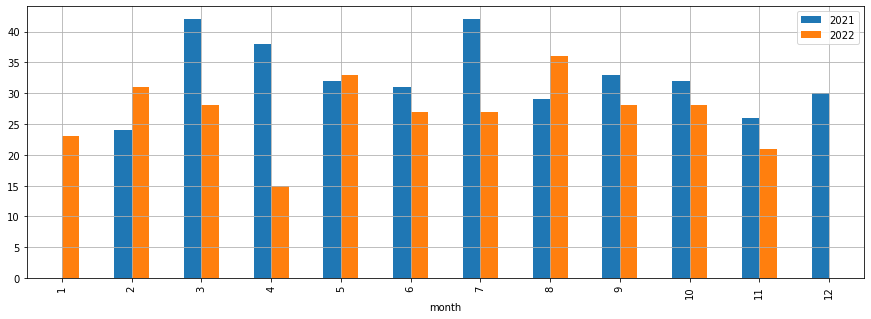

In [69]:
one_test = one[['first_year', 'first_month', 'phone']]
o21 = one_test.query('first_year == 2021')
o22 = one_test.query('first_year == 2022')

oo = pd.DataFrame({'2021' : o21['first_month'],
                   '2022' : o22['first_month'],
                   'month' : one_test['first_month']})
oo = oo.groupby('month').count()
oo.plot(kind='bar', figsize=(15,5), grid=True)
plt.show()

- Хоть в 2022 одноразовых поменьше, но все же их много. 
- Если вспомнить количество новых клиентов, привлеченных по месяцам, то заметно, что большая часть из них не возвращаются.

In [70]:
one_rev = one.merge(rev, on='phone')
one_rev = one_rev[['phone', 'date', 'review']]
pd.options.display.max_colwidth = 3
one_rev

,phone,date,review
0,+7 926 354-45-09,2022-01-19 15:58:37,"Добрый день, друзья! Сегодня у меня был первый визит в Pablo`s. Нашёл этот салон на просторах интернета. Порадовало то, что оправдались все положительные отзывы прочитанные ранее. Отдельное спасибо мастеру Рахману."
1,+7 905 450-51-55,2021-12-13 19:52:49,Всё чётко!!!
2,+7 911 046-64-96,2022-10-16 18:25:17,"Все супер, теперь только к Вам!)"
3,+7 925 849-99-27,2021-11-30 21:03:25,Спасибо огромное Татьяне \nВсе огонь !\nВсем бородачам рекомендую !!!
4,+7 903 670-13-18,2022-10-29 16:09:35,только оценка
5,+7 916 390-01-90,2022-11-09 21:04:55,Был первый раз. Все понравилось.
6,+7 977 490-60-09,2022-09-30 22:01:04,Знает свое дело. Рекомендую
7,+7 966 154-20-00,2022-05-07 22:17:44,"Человек знает свою работу, Спасибо!всё идеально как я и хотел."
8,+7 999 999-26-08,2022-06-01 14:05:18,только оценка
9,+7 910 737-23-15,2022-10-22 19:42:13,"Был первый раз в барбершопе! \nРаботаю мастера доволен на все 100%, скидку сделали 20% как новому клиенту. Меня стриг Максим."


- Все отызвы положительные, но при этом, клиенты не возвращаются. Либо это первое впечатление и оно оказалось обманчивым, либо клиент случайно попал и не может ездить в этот район, либо иная причина

### Визиты одноразовых клиентов

In [71]:
one_phone = one['phone'].reset_index()
one_visits = one_phone.merge(visits, on='phone')
one_visits.head()

,index,phone,client,email,date,employee,order,price,sale,status_visits,data_visit,time_visit,month_visit,year
0,310,+7 963 081-22-85,Юрий,-,2022-06-06 17:00:00,Рахман (Capitan),тонировка бороды,800.0,20.0,Клиент пришёл,2022-06-06,17:00:00,6,2022
1,310,+7 963 081-22-85,Юрий,-,2022-06-06 15:45:00,Рахман (Capitan),тонировка бороды,800.0,20.0,Клиент пришёл,2022-06-06,15:45:00,6,2022
2,332,+7 915 457-81-19,Роман,-,2022-03-02 19:00:00,Рахман (Capitan),стрижка,1300.0,0.0,Клиент пришёл,2022-03-02,19:00:00,3,2022
3,347,+7 999 982-61-87,Андрей,-,2021-02-18 13:30:00,Роберт*,стрижка + моделирование бороды,2000.0,0.0,Клиент пришёл,2021-02-18,13:30:00,2,2021
4,350,+7 985 612-46-75,Павел,-,2022-07-01 20:45:00,Рахман (Capitan),воск (все зоны),400.0,20.0,Клиент пришёл,2022-07-01,20:45:00,7,2022


In [72]:
one_visits['order'].value_counts()

стрижка                               420
стрижка + моделирование бороды        94 
моделирование бороды                  43 
детская стрижка (с 5 до 12 лет)       40 
стрижка бороды (машинкой)             20 
стрижка головы (машинкой)             17 
традиционное бритье                   11 
стрижка головы машинкой 2 насадки     10 
воск                                   9 
премиум стрижка                        4 
отец + сын                             4 
премиум мытье головы                   3 
воск (все зоны)                        3 
тонировка бороды                       3 
камуфляж седины                        2 
мытье головы + окантовка + укладка     2 
мытье головы + укладка                 2 
премиум моделирование                  1 
черная маска                           1 
Name: order, dtype: int64

- Большинство клиентов выбирают на первый и единственный визит стрижку. Это понятно, самая популярная услуга. Стоит сделать на ней акцент и повысить качество работ, чтобы исключить этот факт влияния на отток

In [73]:
one_visits['status_visits'].value_counts()

Клиент пришёл        665
Клиент не пришёл     26 
Клиент подтвердил     1 
Name: status_visits, dtype: int64

- Если новенький клиент не приходит, и не возвращается, стоит ему напомнить о визите

### Отток среди единоразовых

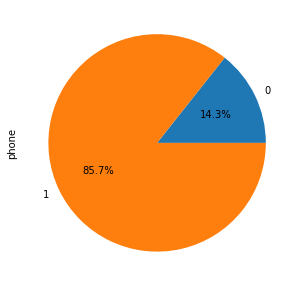

In [74]:
plt.rcParams['figure.figsize'] = [5, 5]
one.groupby('churn')['phone'].count().plot(y='phone', kind='pie', autopct='%1.1f%%')
plt.show()

- 86% клиентов попали в отток уже после одного визита

## Сегментация клиентов

**Предлагаю разделить наших клиентов на 4 группы по кол-ву визитов**

In [75]:
users['visits'].value_counts()

1     701
2     192
3     96 
4     66 
5     40 
6     32 
7     25 
8     25 
9     24 
10    22 
0     13 
11    11 
12     9 
13     7 
16     5 
15     4 
14     3 
17     3 
18     3 
21     2 
19     2 
20     2 
32     1 
30     1 
40     1 
25     1 
26     1 
33     1 
42     1 
Name: visits, dtype: int64

In [76]:
def vis(v):
    if 0 <= v <= 2:
        return 1
    elif 3 <= v <= 5:
        return 2
    elif 5 <= v <= 10:
        return 3
    else:
        return 4
    
users['segment'] = users['visits'].apply(vis)
users.head()

,client,phone,cost,perc_cost,mean_visits,visits,first_visit,last_visit,delta,churn,segment
0,Игорь,+7 977 504-63-14,62346,1,1484,42,2021-03-01,2022-11-01,20,0,4
1,Сергей Александрович,+7 985 994-22-27,53940,0,3371,16,2021-04-01,2022-09-15,67,0,4
2,Сергей,+7 925 492-82-47,53450,0,1619,33,2021-03-04,2022-09-12,70,0,4
3,Николай,+7 925 443-97-65,44689,0,1718,26,2021-03-13,2022-11-05,16,0,4
4,Армен,+7 930 333-30-00,44450,0,1778,25,2021-09-29,2022-11-09,12,0,4


In [77]:
all_vis = users[['phone', 'segment']]
all_vis = all_vis.merge(visits, on = 'phone')
all_vis

,phone,segment,client,email,date,employee,order,price,sale,status_visits,data_visit,time_visit,month_visit,year
0,+7 977 504-63-14,4,Игорь,-,2022-11-01 10:00:00,Рахман (Capitan),стрижка,1600.0,0.0,Клиент пришёл,2022-11-01,10:00:00,11,2022
1,+7 977 504-63-14,4,Игорь,-,2022-10-19 18:30:00,Максим (Soldado),стрижка,1300.0,0.0,Клиент пришёл,2022-10-19,18:30:00,10,2022
2,+7 977 504-63-14,4,Игорь,-,2022-09-28 18:30:00,Рахман (Capitan),стрижка,1600.0,0.0,Клиент пришёл,2022-09-28,18:30:00,9,2022
3,+7 977 504-63-14,4,Игорь,-,2022-09-11 14:30:00,Рахман (Capitan),стрижка,1600.0,0.0,Клиент пришёл,2022-09-11,14:30:00,9,2022
4,+7 977 504-63-14,4,Игорь,-,2022-09-11 14:30:00,Максим (Soldado),стрижка,1300.0,0.0,Клиент пришёл,2022-09-11,14:30:00,9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,+7 977 394-02-41,1,Юрген,-,2022-03-04 14:45:00,Макс (Capitan),воск (все зоны),300.0,0.0,Клиент пришёл,2022-03-04,14:45:00,3,2022
3945,+7 977 444-96-67,1,Настя,-,2022-06-08 13:45:00,Валерия,NaN,0.0,0.0,Клиент не пришёл,2022-06-08,13:45:00,6,2022
3946,+7 977 444-96-67,1,Настя,-,2021-11-27 15:00:00,Татьяна (Soldado),воск (все зоны),300.0,100.0,Клиент пришёл,2021-11-27,15:00:00,11,2021
3947,+7 977 444-96-67,1,Настя,-,2021-11-26 14:30:00,Хамза (Soldado),воск (все зоны),300.0,100.0,Клиент пришёл,2021-11-26,14:30:00,11,2021


### Средние значения в группах

In [78]:
users.groupby('segment').mean().T.round(1)

segment,1,2,3,4
cost,1752.0,5704.9,12815.6,26173.3
perc_cost,0.0,0.0,0.0,0.0
mean_visits,1438.2,1524.8,1634.1,1632.6
visits,1.2,3.7,7.8,16.5
delta,305.0,216.0,126.0,59.5
churn,0.8,0.7,0.4,0.2


- Заметно, что отток 70 и 80% в 1 и 2 группе. То есть даже те клиенты, у кого в среднем 3,7 визита, так же попадают в отток

In [79]:
all_vis.groupby('segment').mean().T.round(1)

segment,1,2,3,4
price,1342.2,1379.7,1418.3,1270.1
sale,5.7,2.0,1.0,1.0
month_visit,6.6,6.5,6.7,6.7
year,2021.5,2021.5,2021.5,2021.5


- Не смотря на количество визитов, стоимость услуг выше у 3 сегмента, а ниже всего у 4

### Частые услуги по сегментам

In [80]:
all_vis.query('segment == 1').value_counts('order').head(5)

order
стрижка                            672
стрижка + моделирование бороды     142
детская стрижка (с 5 до 12 лет)    68 
моделирование бороды               63 
стрижка бороды (машинкой)          30 
dtype: int64

In [81]:
all_vis.query('segment == 2').value_counts('order').head(5)

order
стрижка                            496
стрижка + моделирование бороды     113
детская стрижка (с 5 до 12 лет)    38 
моделирование бороды               33 
стрижка бороды (машинкой)          22 
dtype: int64

In [82]:
all_vis.query('segment == 3').value_counts('order').head(5)

order
стрижка                              671
стрижка + моделирование бороды       166
детская стрижка (с 5 до 12 лет)      66 
стрижка головы машинкой 2 насадки    52 
моделирование бороды                 22 
dtype: int64

In [83]:
all_vis.query('segment == 4').value_counts('order').head(5)

order
стрижка                              587
стрижка головы машинкой 2 насадки    129
стрижка + моделирование бороды       81 
детская стрижка (с 5 до 12 лет)      69 
воск                                 36 
dtype: int64

- Во всех сигментах лидируют одни и те же услуги, но в 4 сегменте вместо `стрижка головы + моделирование бороды` появилась услуга `стрижка головы машинкой 2 насадки`
- Помимо стрижки и бороды в топе должна быть услуга "отец+сын". Детская стрижка есть в каждом сегенте, так почему бы не привлечь клиентов на комплекс услуг

### Любимые мастера по сегментам

In [84]:
all_vis.query('segment == 1 and year == 2022').value_counts('employee').head(5)

employee
Рахман (Capitan)    243
Максим (Soldado)    124
Макс (Capitan)      68 
Давид  (Soldado)    21 
Валерия             20 
dtype: int64

In [85]:
all_vis.query('segment == 2 and year == 2022').value_counts('employee').head(5)

employee
Рахман (Capitan)    192
Максим (Soldado)    67 
Макс (Capitan)      62 
Павел (Capitan)     14 
Давид  (Soldado)    12 
dtype: int64

In [86]:
all_vis.query('segment == 3 and year == 2022').value_counts('employee').head(5)

employee
Рахман (Capitan)    336
Максим (Soldado)    82 
Макс (Capitan)      78 
Павел (Capitan)     29 
Валерия             12 
dtype: int64

In [87]:
all_vis.query('segment == 4 and year == 2022').value_counts('employee').head(5)

employee
Рахман (Capitan)    395
Макс (Capitan)      60 
Максим (Soldado)    47 
Давид  (Soldado)    11 
Валерия              8 
dtype: int64

- Во всех категориях один и тот же мастер в лидерах, скорее всего на него падает большая часть записей, либо из-за графика, либо из-за хорошей работы, либо из-за срока работы

## Прогнозирование оттока клиентов

### Подготовка данных

Для того чтобы спрогнозировать отток, нужно пересести текст в цифры, присвоив им номера и группы

In [88]:
da = users[['phone', 'cost', 'mean_visits', 'visits', 'delta', 'churn', 'segment']]
da = da.merge(visits, on = 'phone')
da = da[['phone', 'cost', 'mean_visits', 'date', 'visits', 'delta', 'churn', 'segment', 'employee', 'order', 'price', 'sale', 'status_visits', 'month_visit', 'year']]
da['hour'] = da['date'].dt.hour
da = da[['cost', 'mean_visits', 'visits', 'delta', 'churn', 'segment', 'employee', 'order', 'price', 'sale', 'status_visits', 'month_visit', 'year', 'hour']]
da.head(2)

,cost,mean_visits,visits,delta,churn,segment,employee,order,price,sale,status_visits,month_visit,year,hour
0,62346,1484,42,20,0,4,Рахман (Capitan),стрижка,1600.0,0.0,Клиент пришёл,11,2022,10
1,62346,1484,42,20,0,4,Максим (Soldado),стрижка,1300.0,0.0,Клиент пришёл,10,2022,18


In [89]:
def empl(em):
    if em == 'Рахман (Capitan)':
        return 1
    elif em == 'Максим (Soldado)':
        return 2
    elif em == 'Макс':
        return 3
    elif em == 'Шах(Capitan)':
        return 4
    elif em == 'Аннет (Стажер)':
        return 5
    elif em == 'Валерия':
        return 6
    else:
        return 0

da['employee'] = da['employee'].apply(empl)

In [90]:
def status(st):
    if st == 'Клиент пришёл':
        return 1
    else:
        return 0

da['status_visits'] = da['status_visits'].apply(status)

In [91]:
def order(ord):
    if ord == 'стрижка':
        return 1
    elif ord == 'детская стрижка (с 5 до 12 лет)':
        return 1
    elif ord == 'стрижка + моделирование бороды':
        return 2
    elif ord == 'стрижка бороды (машинкой)':
        return 3
    elif ord == 'моделирование бороды':
        return 3
    elif ord == 'воск (все зоны)':
        return 4
    elif ord == 'воск':
        return 4
    elif ord == 'камуфляж седины':
        return 4
    elif ord == 'стрижка головы машинкой 2 насадки':
        return 1
    elif ord == 'стрижка головы (машинкой)':
        return 1
    elif ord == 'тонировка бороды':
        return 4
    elif ord == 'традиционное бритье':
        return 5
    elif ord == 'мытье головы + окантовка + укладка':
        return 6
    elif ord == 'черная маска':
        return 4
    elif ord == 'отец + сын':
        return 1
    elif ord == 'премиум мытье головы':
        return 7
    elif ord == 'премиальный уход за лицом':
        return 7
    elif ord == 'премиум стрижка':
        return 7
    elif ord == 'премиум моделирование':
        return 7
    elif ord == 'мытье головы + укладка':
        return 6
    else:
        return 0
    
da['order'] = da['order'].apply(order)
da.head() 

,cost,mean_visits,visits,delta,churn,segment,employee,order,price,sale,status_visits,month_visit,year,hour
0,62346,1484,42,20,0,4,1,1,1600.0,0.0,1,11,2022,10
1,62346,1484,42,20,0,4,2,1,1300.0,0.0,1,10,2022,18
2,62346,1484,42,20,0,4,1,1,1600.0,0.0,1,9,2022,18
3,62346,1484,42,20,0,4,1,1,1600.0,0.0,1,9,2022,14
4,62346,1484,42,20,0,4,2,1,1300.0,0.0,1,9,2022,14


Итак, что мы тут наменяли:
- колонка `employee`
 - 1 - 'Рахман (Capitan)'
 - 2 - 'Максим (Soldado)'
 - 3 - 'Макс'
 - 4 - 'Шах(Capitan)'
 - 5 - 'Аннет (Стажер)'
 - 6 - 'Валерия' 
 - 0 - все остальные
 
 
- колонка `order`:
 - 1 - все стрижки
 - 2 - комплекс стрижка и борода
 - 3 - борода
 - 4 - доп.услуги
 - 5 - бритье
 - 6 - укладки
 - 7 - премиум услуги
 - 0 - все остальное
 
 
- колонка `status_visits`:
 - 1 - Клиент пришел
 - 0 - все остальное

**Таблица готова к прогнозу**

### Сравнение моделей прогрозирования

**Что будем делать:** Строить модель классификации клиентов, где целевой признак — факт оттока клиента:

- Разделим данные на обучающую и валидационную выборку
- Обучим модель на train-выборке двумя способами: логистической регрессией и случайным лесом.
- Оценим метрики accuracy, precision и recall для моделей на валидационной выборке. Сравним по ним модели.

In [92]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = da.drop('churn', axis=1)
y = da['churn']

In [93]:
#разделяем модель на обучающую и валидационную выборки (80\20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()

#обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
X_train_st = scaler.fit_transform(X_train) 
print(X_train_st[:5])

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

[[-0.12329318 -0.59495439  0.09072964 -0.72652532  0.42659961 -0.7044727
  -0.43808068 -0.24121751 -0.30512465  0.21128856 -0.52383076 -1.01050148
   1.59311166]
 [-0.60687211 -0.48207374 -0.51573447  0.56957975 -0.44848361 -0.7044727
  -0.43808068 -0.24121751 -0.30512465  0.21128856 -0.20517461 -1.01050148
   0.94361308]
 [-0.92701231 -0.62465983 -0.87961293  1.83763059 -1.32356683 -0.7044727
  -0.43808068 -0.24121751 -0.30512465  0.21128856  0.11348153 -1.01050148
   0.61886379]
 [-0.76848782 -0.95538034 -0.63702729  0.43491948 -0.44848361 -0.7044727
  -0.43808068 -0.13316985 -0.30512465  0.21128856  1.70676227 -1.01050148
  -1.65438123]
 [ 0.816757    1.50422972  0.21202246 -0.5357566   0.42659961  0.38163236
   5.67183932 -2.18607533 -0.30512465  0.21128856  0.43213768  0.98960765
   0.94361308]]


**Случайный лес**

In [95]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators = 100, random_state=0) 

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# выведем все метрики
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00


### Прогнозирование

In [96]:
#SelectFromModel выберет те функции, важность которых больше, чем средняя важность всех функций по умолчанию.
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [97]:
#какие функции важны, мы можем использовать get_support метод на подогнанной модели
#Он вернет массив логический значения.
sel.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False])

In [98]:
#Теперь мы можем составить список и сосчитать выбранные функции.
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

2

In [99]:
#название выбранных функций
selected_feat

Index(['cost', 'delta'], dtype='object')

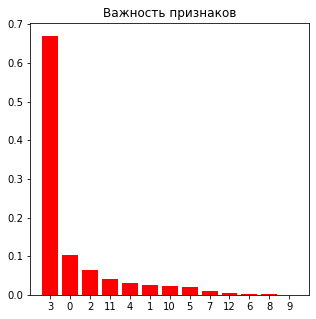

In [100]:
importances = sel.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Важность признаков")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [101]:
importance = pd.DataFrame({'feature': X.columns, 'importance':rf_model.feature_importances_})
importance.sort_values(by='importance', ascending=False)

,feature,importance
3,delta,0.665070
0,cost,0.085464
2,visits,0.057409
4,segment,0.048551
11,year,0.042655
10,month_visit,0.027879
1,mean_visits,0.027616
5,employee,0.022092
7,price,0.011305
12,hour,0.004624


- Получается, что на отток больше всего влияют `delta`, `cost`, `visits`
- Очень важно работать над удержанием клиента и не допускать большого разрыва между записями
- Общий счет выручки клиента сильно влияет на отток, поэтому нужно повышать продажи
- Как мы видим скидка вообще не влияет на факт оттока, так же как и услуга


## Выводы и рекомендации

- В условиях новых реалий мира очень многие клиенты попали в зону жесткой экономии, поэтому необходимо делать упор на удешевление услуг, сохраняя качество. Это не значит, что нужно срочно закупать дешевые материалы, но стоит поискать более дешевую альтернативу, например, поддерживая российских производителей (как бы странно это ни звучало), потому что премиум услугами пользуется малое количество клиентов


- Следует пересмотреть прайс и сделать его более ёмким. Мытье головы можно автоматически включить в стоимость и не указывать его в прайсе (это и так необходимо делать при любой услуге). Сделать несколько комплексов, чтобы у клиентов был выбор премиум комплекса и обычного. Рекомендую рассмотреть вариант системы "Все включено", сделав 3-5 вариантов на каждого клиента. Во-первых, это упростит прайс, во-вторых, это возможность заработать на тех клиентах, кто не может платить много. Дополнительные услуги можно оставить допом. Идельно в прайсе иметь не такой сильны разброс в ценах, они все разные, упростить и сократить. Нужно позволить клиентам пользоваться услугами, когда для них 1600 это дорого, предложите альтернативу


- Очень малая часть клиентов ходит вместе с детьми и пользуются услугой `отец + сын`, рекомендую провести акцию, рассказать клеинтам о выгодной цене и проинформировать о таком комплексе. Возможно, многие клиенты барбершопа даже не знают, что при комплексе отец+сын они получают скидку на обе стрижки. Десткие стрижки делают часто, значит нужно привлекать клиентов на клмплекс услуг. Так же стоит сделать комплекс для друзей


- Самое провальное время с 20:00 и до закрытия, в это время стоит поставить скидку на посещение и тем самым забить запись мастерам. Раз в неделю по понедельникам можно делать скидку на утреннее время, в этот день недели самое меньшее количество записей


- Нужно поднимать средний чек, предлагая домашний уход и аксессуары. Чтобы клиент совершил покупку, следует еще на этапе стрижки и мытья головы презентовать продукцию в качестве дружеского совета профессионала, рассказывая о преимуществах и вреде обычного масмаркета. Если у мастеров возникают проблемы с "мягкими" продажами, то рекомендую отправить весь персонал на курс по продажам, ориентированном именно на барбершопах (во многих школах барберов такие есть)


- Нужно подготовится к предстоящим новогодним праздникам и сделать подарки постоянным клиентам в виде промокодов на стрижку в январе (нужно не опуститься ниже уровня 2022 года). На будущее нужно активно привлекать клиентов в апреле, чтобы не допускать "просадки". Например: промокод каждому, кто был в марте на следующий месяц


- Необходимо пересмотреть каналы привлечения новых клиентов, потому что в 2022 году заметен резкий спад по количеству новых клиентов (таргет, бартер, блогеры, спонсорство мероприятий, офлайн реклама...). Хороший поиск новых клиентов - привлечение через текущих, а именно акция "приведи друга". Рекомендация своим знакомым дает скидку и клиенту и его другу (желательно в денежном эквиваленте, например 300-500р), при условии, что друг воспользуется услугами барбершопа и оплатит их. За каждую отметку в инстаграме выдавать бонусы на счет в CRM


- Необходимо проводить работу с клиентами, кто пришел один раз и не возвращается. Если спустя два месяца клиент не вернулся, то стоит ему напомнить о визите в барбершоп, предложив промокод


- У каждого нового клиента после визита нужно запрашивать обратную связь. И желательно не сразу, а через пару дней, когда клиент уже помыл голову дома, его прическу увидели домашние и у него сложилась полная картина о стрижке и заведении. Можно предложить таким клиентам промокод за публикацию отзыва, желательно в яндексе. Не удалять плохие отзывы, а работать над ними. Возможно, все дело в некачественных услугах


- Скидки новым клиентам это хорошо, но нет гарантии, что без скидки он сможет позволить себе данную услугу. Считаю нужным сократить размер первой скидки или вводить дополнительные кампании по удержанию клиентов. Скидка на первый визит должна полагаться каждому новому клиенту и это нужно контролировать, возможности Yclients это позволяют


- Ввести бонусную систему в CRM, автоматически копить клиентам кэшбек 5%. Начислять бонусы можно самостоятельно и временно, оповещая об этом клиентов, например, начислить потеряшке 500р бонусов на следующий визит сроком в один месяц. 1 бонус = 1 рубль, потратить можно до 50% оплаты чека


- Рассылки клиентам нельзя делать часто, чтобы не отправиться в спам или блок. Если клиент за 2-3 рассылки с промокодами и баллами не вернулся, то он оканчательно останется в оттоке, оставьте его в покое, вы уже его потеряли. 


- Проводить анализ клиентов необходимо ежемесячно и работаь с потеряшками, которые докатились до текущего периода (потерей можно считать непосещение заведения более 60-90 дней)


- Стоит регулярно отправлять мастеров на повышения и мастер-классы для повышения уровня предоставляемых услуг


- Напоминать о визите тем, кто не пришел на запись и не записался вновь


- Очень важно работать над удержанием клиента и не допускать большого разрыва между записями.


- Общий счет выручки клиента сильно влияет на отток, поэтому нужно повышать продажи, предлагать доп услуги (но не навязывать).


- Максимально дружеское расположение клиента повышает его лояльность


- Для внедрения новой системы, новых акций и прочих мероприятий можно провести опрос среди клиентов относящихся к 3 и 4 категориям


- Пока таргет в инстаграме невозможен, нужно работать над таргетом в яндексе и Вконтакте. Поиск новых клиентов по всем доступным площадкам. Работать над карточкой заведения в Яндексе и заполучить заведную звезду "Отличное место" с рейтингом (уже более свежую) и гордится этим


- Изучив отзывы могу сказать следущее (все эти пункты влияют на мнение клиентов о барбершопе): 
 - Мастерам стоит поработать над качеством услуг. 
 - Стиль одежды администраторов должен быть строгим и элегантным, единым
 - Форма мастеров должна быть одинаковой, чистой и опрятной
 - Создавать первое впечатление необходимо с первой секунды гостя (а именно с записи и входа). Никогда нельзя второй раз создать первой впечатление
 - Обратить внимание на кресло и мойку, многие клиенты жалуются на неудобство
 - Гостям не приятно находится в зале, где есть другой заведение и через них ходят покупатели. Это "проходной двор" и такое недопустимо для создания комфортной атмосферы. Нужно как-то решаить такую проблему
 - В комнате персонала должна быть чистота и порядок и дверь должна быть всегда закрыта. Никакие запахи не должны разносится по общему залу. В таких заведения запрещено употреблять еду с сильными запахами (фаст фуд, рыба..)
 - Нельзя спорить с клиентом и предлагать свое видение, если клиент изначально указал на четкий план стрижки
 - Внимание к клиенту важный момент, это касается и внимательного слушания и аккуратного внимания со стороны администратора
 - При стрижки голову нужно мыть всегда два раза: до и после
 - Некоторые клиенты жалуются на дискомфорт при мытье головы. Грубо и жестко
 - Много отзывов на следующий день после стрижки, где клиенты замечают косяки. Это важный пункт после которого клиент не вернется
 - Нужно отвечать на каждый отзыв и давать обратную связь, не важно плохой он или хороший. Многие ответы в Яндексе выглядят с насмешкой, наличие большого количества "))))", лучше использовать подходящие смайлики для дружелюбного настроя
 - Очень много отзывов (и не только на яндексе) о некачетсвенных стрижках и многие замечают это уже после мытья головы дома. Укладывать и скрывать недостатки плохое качество мастера
 - Нужно искать и привлекать более опытных специалистов, предлагая лучшие условия (выходы, премии, другой %)
 - Музыка не может быть громкой и мешать клиентам. Стоит выбрать онлайн радио с универсальной музыкой, более подходящей заведению и каждому клиенту
 - Общение между персоналом на личные темы не допустимы. Нужно поработать над сервисом